## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [6]:
%%time
n = X.shape[1]
W = np.array([1, 0.5])
W_old  = np.array([0,0])
print(f'Number of objects = {n} \
       \nInitial weights = {W} \n')
mse = np.inf
w_new = np.array([])
# выбранное значение alpha_checked сначала приравняем к бесконечности (т.к. alpha_checked еще не определено)
alpha_checked = np.inf
# значение alpha подбирается из короткого списка возможных значений
# в списке numpy массиве W будут храниться значения, которые будут проверяться на mse
# в списке numpy массиве W_old будут храниться значения, которые уже проверены на mse; если mse удовлетворит критерию в коде
# то W_old сохранится в w_new, alpha - в alpha_checked
for alpha in [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11]:
    W = np.array([1, 0.5])
    W_old  = np.array([0,0])
    i=1
    while (W[0]-W_old[0]>alpha) | (W[1]-W_old[1]>alpha):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_old = W.copy()        
#         это будет использовано в следующем цикле для вычисления y_pred и err; для текущих W err уже вычислена
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
#         if i % 10 == 0:
#             alpha /= 1.1
        i+=1
    if err<mse:
        mse = err
        w_new = W_old
        alpha_checked = alpha#/(1/1.1)
    else:
        break
    print(alpha_checked, mse)
    i_prev = i-1
print(f'Потребовалось {i_prev} итераций')
print(f'Выбрано значение альфа {alpha_checked}')
print(f'Найдены коэффициенты: {w_new}.')
print(f'MSE: {mse}.')

Number of objects = 10        
Initial weights = [1.  0.5] 

0.01 44.525885301240166
Потребовалось 400 итераций
Выбрано значение альфа 0.01
Найдены коэффициенты: [43.97488723  4.00972181].
MSE: 44.525885301240166.
CPU times: user 235 ms, sys: 7.88 ms, total: 243 ms
Wall time: 235 ms


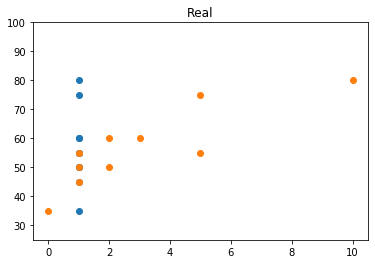

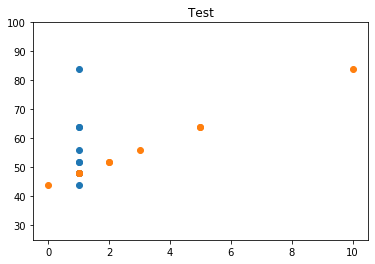

In [7]:
plt.scatter(X.T[:,0],y);
plt.scatter(X.T[:,1],y);
plt.title('Real')
plt.ylim(25,100)
plt.show()
plt.scatter(X.T[:,0],y_pred);
plt.scatter(X.T[:,1],y_pred);
plt.ylim(25,100)
plt.title('Test');

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [8]:
%%time
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W_pred = np.array([0,0])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

i=1
while (W[0]-W_pred[0]>alpha) | (W[1]-W_pred[1]>alpha):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W_pred = W.copy()
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W_pred}, MSE = {err}')
    i+=1
W

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [ 6.27409912 10.61491815], MSE = 752.0184356756685
Iteration #20: W_new = [ 9.70637726 10.22071623], MSE = 632.7150870310963
Iteration #30: W_new = [12.80215106  9.66237609], MSE = 534.1424546924876
Iteration #40: W_new = [15.62642367  9.15027805], MSE = 452.07375384905697
Iteration #50: W_new = [18.203436    8.68297713], MSE = 383.7456343612789
Iteration #60: W_new = [20.55484099  8.2565861 ], MSE = 326.857541015558
Iteration #70: W_new = [22.70038977  7.86752391], MSE = 279.4940955004128
Iteration #80: W_new = [24.65810422  7.51252258], MSE = 240.06060706491297
Iteration #90: W_new = [26.4444285   7.18860021], MSE = 207.22938050865514
Iteration #100: W_new = [28.07436714  6.89303597], MSE = 179.89501370640292
Iteration #110: W_new = [29.56161109  6.62334721], MSE = 157.13717956944907
Iteration #120: W_new = [30.91865271  6.37726863], MSE = 138.189639340991
Iteration #130: 

array([43.98480618,  4.00792316])

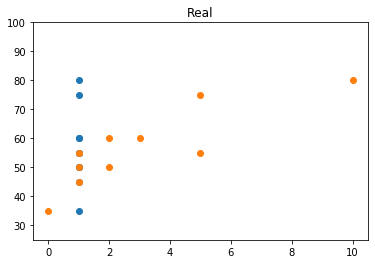

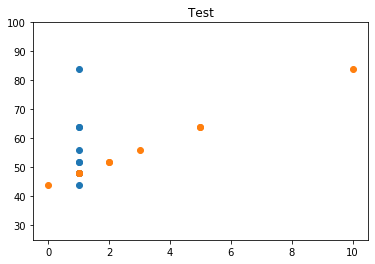

In [9]:
plt.scatter(X.T[:,0],y);
plt.scatter(X.T[:,1],y);
plt.title('Real')
plt.ylim(25,100)
plt.show()
plt.scatter(X.T[:,0],y_pred);
plt.scatter(X.T[:,1],y_pred);
plt.ylim(25,100)
plt.title('Test');

In [10]:
%%time
n = X.shape[1]
# alpha = 1e-2
W = np.array([1, 0.5])
W_old  = np.array([0,0])
print(f'Number of objects = {n} \
       \nInitial weights = {W} \n')
mse = np.inf
w_new = np.array([])
# выбранное значение alpha_checked сначала приравняем к бесконечности (т.к. alpha_checked еще не определено)
alpha_checked = np.inf
# значение alpha подбирается из короткого списка возможных значений
# в списке numpy массиве W будут храниться значения, которые будут проверяться на mse
# в списке numpy массиве W_old будут храниться значения, которые уже проверены на mse; если mse удовлетворит критерию в коде
# то W_old сохранится в w_new, alpha - в alpha_checked
for alpha in [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11]:
    W = np.array([1, 0.5])
    W_old  = np.array([0,0])
    i=1
    while (W[0]-W_old[0]>alpha) | (W[1]-W_old[1]>alpha):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_old = W.copy()        
#         это будет использовано в следующем цикле для вычисления y_pred и err; для текущих W err уже вычислена
        W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1))
#         if i % 10 == 0:
#             alpha /= 1.1
        i+=1
    if err<mse:
        mse = err
        w_new = W_old
        alpha_checked = alpha#/(1/1.1)
    else:
        break
    print(alpha_checked, mse)
    i_prev = i-1
print(f'Потребовалось {i_prev} итераций')
print(f'Выбрано значение альфа {alpha_checked}')
print(f'Найдены коэффициенты: {w_new}.')
print(f'MSE: {mse}.')

Number of objects = 10        
Initial weights = [1.  0.5] 

0.01 44.525885301240166
Потребовалось 400 итераций
Выбрано значение альфа 0.01
Найдены коэффициенты: [43.97488723  4.00972181].
MSE: 44.525885301240166.
CPU times: user 193 ms, sys: 2.02 ms, total: 195 ms
Wall time: 193 ms


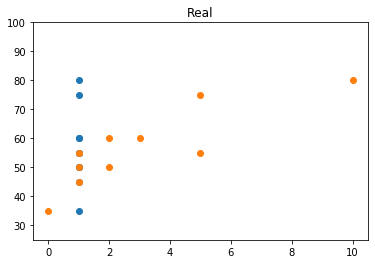

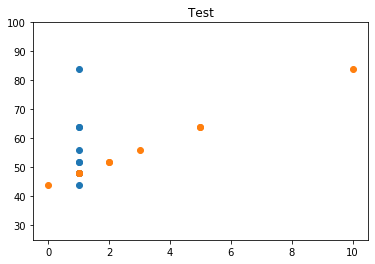

In [11]:
plt.scatter(X.T[:,0],y);
plt.scatter(X.T[:,1],y);
plt.title('Real')
plt.ylim(25,100)
plt.show()
plt.scatter(X.T[:,0],y_pred);
plt.scatter(X.T[:,1],y_pred);
plt.ylim(25,100)
plt.title('Test');